## PROJECT :
## HOUSE PRICE PREDICTION(Using Linear Regression)

#### IMPORTING LIBRARIES

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

##### READING THE DATASET

In [3]:
HouseDF = pd.read_csv('USA_Housing (2).csv')
HouseDF.head()    

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#### INFORMATION OF DATASET

In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### DESCRIBING DATA

In [5]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### COLUMNS 

In [6]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### PRICE VALUES

In [7]:
HouseDF['Price'].values

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

#### SHAPE

In [8]:
print(HouseDF.shape)
print(HouseDF['Price'].value_counts())

(5000, 7)
1.059034e+06    1
1.521141e+06    1
1.148372e+06    1
2.065710e+06    1
1.749820e+06    1
               ..
1.444701e+06    1
7.884278e+05    1
8.759045e+05    1
9.844212e+05    1
1.298950e+06    1
Name: Price, Length: 5000, dtype: int64


#### GRAPH PLOTTING 

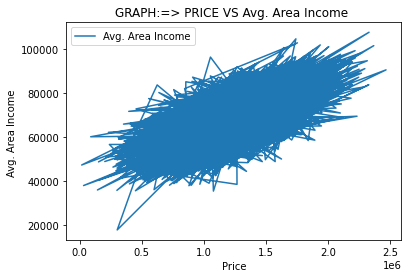

In [9]:
HouseDF.plot(x='Price', y='Avg. Area Income', style='-') 
plt.title('GRAPH:=> PRICE VS Avg. Area Income ') 
plt.xlabel('Price') 
plt.ylabel('Avg. Area Income ') 
plt.show()

##### Data Analysis for House Price Prediction

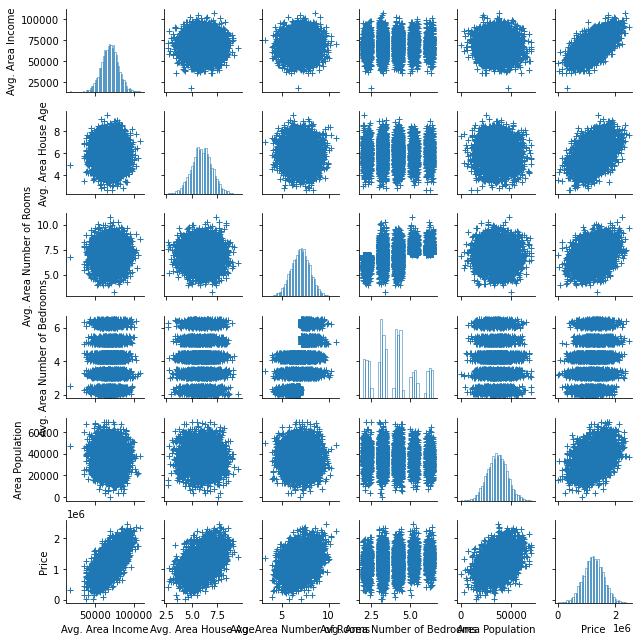

In [10]:
sns.pairplot(HouseDF, plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),height=1.5)

<AxesSubplot:xlabel='Price', ylabel='Density'>

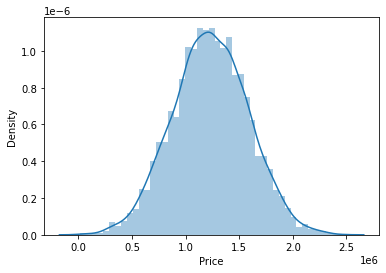

In [11]:
sns.distplot(HouseDF['Price'])

<AxesSubplot:>

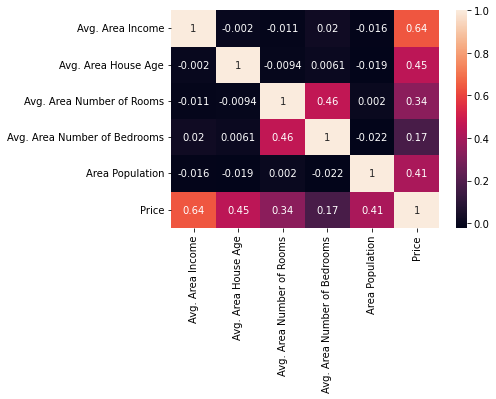

In [12]:
sns.heatmap(HouseDF.corr(), annot=True)

#### Training a Linear Regression Model

In [13]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

#### Split Data into Train, Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [15]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression()

In [16]:
print(lm.intercept_)

-2640159.7968525267


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [18]:
predictions = lm.predict(X_test)  
print(predictions)

[1260960.70567627  827588.75560334 1742421.2425434  ...  372191.40626923
 1365217.15140897 1914519.5417887 ]


#### Predictions from our Linear Regression Model

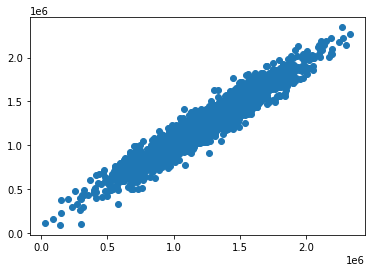

In [19]:
plt.scatter(y_test,predictions)

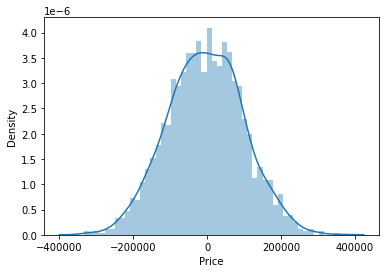

In [20]:
sns.distplot((y_test-predictions),bins=50); 

#### Regression Evaluation Metrics

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 82288.22251914947
MSE: 10460958907.209059
RMSE: 102278.82922290936
